In [1]:
import numpy as np
import pandas as pd

In [2]:
data=pd.read_csv("E:\Datasets\medical_insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
data.shape

(1338, 7)

In [5]:
# Check missing values
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [7]:
data.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

### 1) the average charges of the southest and northest female medical insurance 

In [8]:
F_data=data.loc[(data['sex']=="female")&((data['region']=='southeast')|(data['region']=='northeast'))]
F_data

,age,sex,bmi,children,smoker,region,charges
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
11,62,female,26.290,0,yes,southeast,27808.72510
13,56,female,39.820,0,no,southeast,11090.71780
16,52,female,30.780,1,no,northeast,10797.33620
...,...,...,...,...,...,...,...
1326,42,female,32.870,0,no,northeast,7050.02130
1328,23,female,24.225,2,no,northeast,22395.74424
1330,57,female,25.740,2,no,southeast,12629.16560
1334,18,female,31.920,0,no,northeast,2205.98080


In [9]:
F_data.region.unique()

array(['southeast', 'northeast'], dtype=object)

In [10]:
F_data.sex.unique()

array(['female'], dtype=object)

In [11]:
F_data.groupby('region')['charges'].mean().round(2)

region
northeast    12953.20
southeast    13499.67
Name: charges, dtype: float64

#### Average charges of southeast female medical insurance=12953.20
#### Average charges of northeast female medical insurance= 13499.67


### 2)Analysis on male and female smokers in different region

In [12]:
# import libraries
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sex', ylabel='count'>

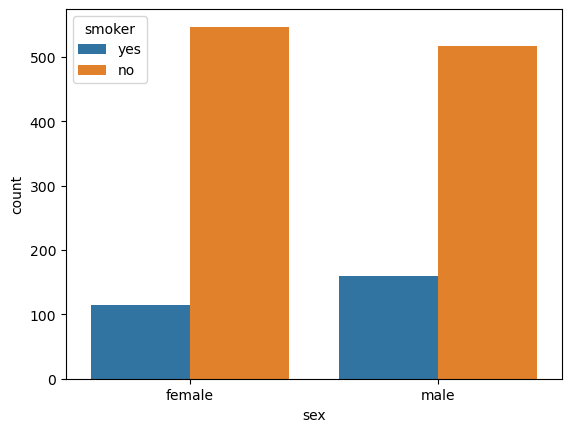

In [13]:

sns.countplot('sex',hue='smoker',data=data)


C:\Users\pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='region', ylabel='count'>

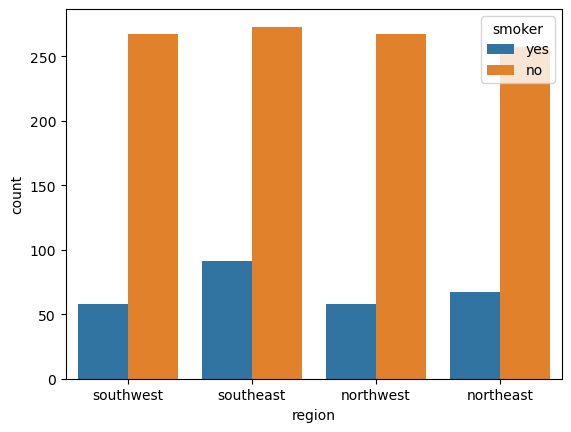

In [14]:
sns.countplot('region',hue='smoker',data=data)

In [15]:
category=[]
for x in data['age']:
    if 0<=x<15:
        category.append("Kid")
    elif 15<=x<30:
        category.append("Teen")
    elif 30<=x<50:
        category.append("Adult")
    elif 50<=x<100:
        category.append('Old age')
    else:
        category.append("Not known")
        

In [16]:
data.insert(1,"age_category",category)

In [17]:
data.head()

,age,age_category,sex,bmi,children,smoker,region,charges
0,19,Teen,female,27.900,0,yes,southwest,16884.92400
1,18,Teen,male,33.770,1,no,southeast,1725.55230
2,28,Teen,male,33.000,3,no,southeast,4449.46200
3,33,Adult,male,22.705,0,no,northwest,21984.47061
4,32,Adult,male,28.880,0,no,northwest,3866.85520


In [18]:
data.age_category.unique()

array(['Teen', 'Adult', 'Old age'], dtype=object)

### the female and male medical average cost by category

In [19]:
data.groupby(['sex','age_category'])['charges'].mean().round(3)

sex     age_category
female  Adult           12244.955
        Old age         17144.973
        Teen             8560.365
male    Adult           13989.212
        Old age         18680.067
        Teen             9761.406
Name: charges, dtype: float64

In [20]:
pd.pivot_table(index=['sex'],columns=['age_category'],values=['charges'],aggfunc=("mean"),data=data)

charges                           
age_category         Adult       Old age         Teen
sex                                                  
female        12244.954942  17144.973500  8560.364914
male          13989.212215  18680.066919  9761.406405

### the female and male medical count cost by category

In [21]:
pd.pivot_table(index=['sex'],columns=['age_category'],values=['charges'],aggfunc=("sum"),data=data)

charges                            
age_category         Adult       Old age          Teen
sex                                                   
female        3.257158e+06  3.343270e+06  1.720633e+06
male          3.777087e+06  3.549213e+06  2.108464e+06

In [22]:
pd.pivot_table(index=['sex'],columns=['age_category'],values=['charges'],aggfunc=("count"),data=data)

charges             
age_category   Adult Old age Teen
sex                              
female           266     195  201
male             270     190  216

In [23]:
data.groupby(['sex','age_category'])['charges'].sum().round(3)

sex     age_category
female  Adult           3257158.015
        Old age         3343269.832
        Teen            1720633.348
male    Adult           3777087.298
        Old age         3549212.715
        Teen            2108463.784
Name: charges, dtype: float64

### the female and male medical minimum cost by category.

In [24]:
data.groupby(['sex','age_category'])['charges'].min().round(3)

sex     age_category
female  Adult           3554.203
        Old age         8932.084
        Teen            1607.510
male    Adult           3260.199
        Old age         8442.667
        Teen            1121.874
Name: charges, dtype: float64

In [25]:
pd.pivot_table(index=['sex'],columns=['age_category'],values=['charges'],aggfunc=("min"),data=data)

charges                     
age_category     Adult   Old age       Teen
sex                                        
female        3554.203  8932.084  1607.5101
male          3260.199  8442.667  1121.8739

### the female and male medical maximum cost by category.

In [26]:
pd.pivot_table(index=['sex'],columns=['age_category'],values=['charges'],aggfunc=("max"),data=data)

charges                          
age_category        Adult      Old age         Teen
sex                                                
female        58571.07448  63770.42801  40904.19950
male          62592.87309  60021.39897  51194.55914

### adult and old age BMI of smokers only.

In [27]:
b=data.loc[((data['age_category']=='Adult')|(data['age_category']=='Old age'))&(data['smoker']=='yes')]
b.age_category.unique()

array(['Old age', 'Adult'], dtype=object)

In [28]:
b['age_category'].value_counts()

Adult      120
Old age     68
Name: age_category, dtype: int64

In [29]:
pd.pivot_table(columns=['age_category'],values=['bmi'],aggfunc=['mean'],data=b)

mean           
age_category     Adult    Old age
bmi           30.33575  31.713676

In [30]:
data.columns

Index(['age', 'age_category', 'sex', 'bmi', 'children', 'smoker', 'region',
       'charges'],
      dtype='object')

### the people less than 10000 charges those have smokers daily (Show count male/female).

In [31]:
d1=data.loc[(data['charges']<=10000)&((data['smoker']=='yes'))]
d1

,age,age_category,sex,bmi,children,smoker,region,charges


### the (Categories) and show the descending order those having the highest smoker male/female

In [32]:
data.groupby(['age_category','sex'])['smoker'].value_counts()

age_category  sex     smoker
Adult         female  no        216
                      yes        50
              male    no        200
                      yes        70
Old age       female  no        167
                      yes        28
              male    no        150
                      yes        40
Teen          female  no        164
                      yes        37
              male    no        167
                      yes        49
Name: smoker, dtype: int64